In [4]:
import pandas as pd

In [5]:
data = pd.read_csv("adult.csv")

In [6]:
data

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [7]:
data.education.value_counts()

education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: count, dtype: int64

In [8]:
data.workclass.value_counts()

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

In [9]:
data.occupation.value_counts()

occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64

In [10]:
data = pd.concat([data.drop('occupation', axis=1),pd.get_dummies(data.occupation).add_prefix('occupation_')], axis=1)

In [11]:
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,relationship,race,gender,capital-gain,...,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving
0,25,Private,226802,11th,7,Never-married,Own-child,Black,Male,0,...,False,False,True,False,False,False,False,False,False,False
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Husband,White,Male,0,...,True,False,False,False,False,False,False,False,False,False
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Husband,White,Male,0,...,False,False,False,False,False,False,True,False,False,False
3,44,Private,160323,Some-college,10,Married-civ-spouse,Husband,Black,Male,7688,...,False,False,True,False,False,False,False,False,False,False
4,18,?,103497,Some-college,10,Never-married,Own-child,White,Female,0,...,False,False,False,False,False,False,False,False,False,False


In [12]:
data = pd.concat([data.drop('workclass', axis=1),pd.get_dummies(data.workclass).add_prefix('workclass_')], axis=1)
data = pd.concat([data.drop('marital-status', axis=1),pd.get_dummies(data['marital-status']).add_prefix('marital-status_')], axis=1)
data = pd.concat([data.drop('relationship', axis=1),pd.get_dummies(data.relationship).add_prefix('relationship_')], axis=1)
data = pd.concat([data.drop('native-country', axis=1),pd.get_dummies(data['native-country']).add_prefix('native-country_')], axis=1)
data = pd.concat([data.drop('race', axis=1),pd.get_dummies(data.race).add_prefix('race_')], axis=1)
data = data.drop('education', axis=1)

In [13]:
data.head()

,age,fnlwgt,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation_?,occupation_Adm-clerical,...,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White
0,25,226802,7,Male,0,0,40,<=50K,False,False,...,False,False,True,False,False,False,False,True,False,False
1,38,89814,9,Male,0,0,50,<=50K,False,False,...,False,False,True,False,False,False,False,False,False,True
2,28,336951,12,Male,0,0,40,>50K,False,False,...,False,False,True,False,False,False,False,False,False,True
3,44,160323,10,Male,7688,0,40,>50K,False,False,...,False,False,True,False,False,False,False,True,False,False
4,18,103497,10,Female,0,0,30,<=50K,True,False,...,False,False,True,False,False,False,False,False,False,True


In [14]:
data['gender']=data['gender'].map({'Male':1,'Female':0})
data['income']=data['income'].map({'<=50K':0,'>50K':1})

In [15]:
# data['gender']
data['income']

0        0
1        0
2        1
3        1
4        0
        ..
48837    0
48838    1
48839    0
48840    0
48841    1
Name: income, Length: 48842, dtype: int64

In [16]:
data.head()

,age,fnlwgt,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation_?,occupation_Adm-clerical,...,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White
0,25,226802,7,1,0,0,40,0,False,False,...,False,False,True,False,False,False,False,True,False,False
1,38,89814,9,1,0,0,50,0,False,False,...,False,False,True,False,False,False,False,False,False,True
2,28,336951,12,1,0,0,40,1,False,False,...,False,False,True,False,False,False,False,False,False,True
3,44,160323,10,1,7688,0,40,1,False,False,...,False,False,True,False,False,False,False,True,False,False
4,18,103497,10,0,0,0,30,0,True,False,...,False,False,True,False,False,False,False,False,False,True


<Axes: >

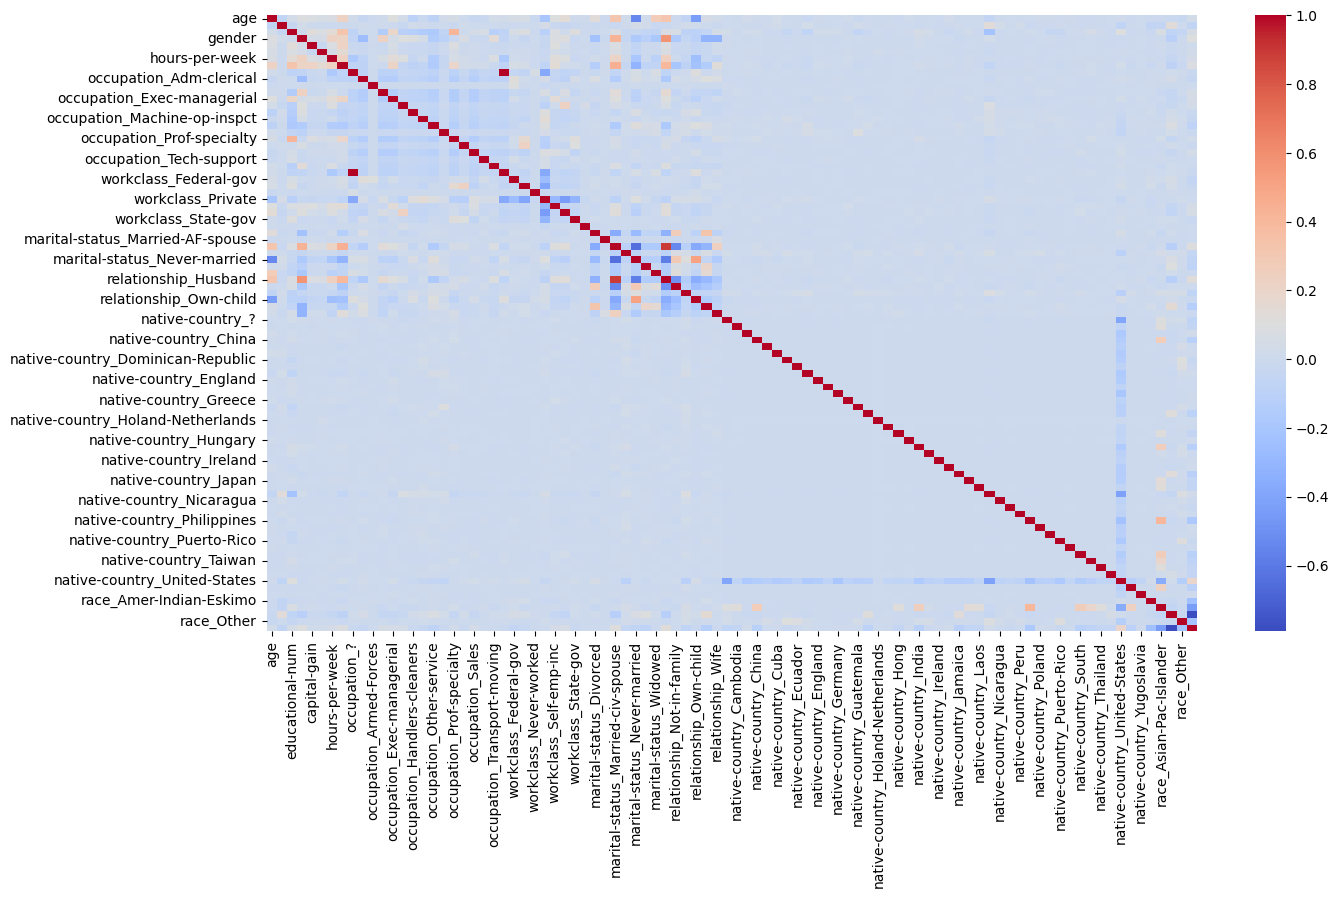

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

plt.figure(figsize=(15,8))

sns.heatmap(data.corr(numeric_only=True),annot=False , cmap='coolwarm')

In [18]:
correlations=data.corr()['income'].abs()
sorted_correlations=correlations.sort_values()
num_cols_to_drop=int(0.8*len(data.columns))
cols_to_drop=sorted_correlations.iloc[:num_cols_to_drop].index
df_dropped=data.drop(cols_to_drop,axis=1)

In [19]:
df_dropped.head()

,age,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation_Exec-managerial,occupation_Other-service,occupation_Prof-specialty,workclass_Self-emp-inc,marital-status_Divorced,marital-status_Married-civ-spouse,marital-status_Never-married,relationship_Husband,relationship_Not-in-family,relationship_Own-child,relationship_Unmarried,relationship_Wife
0,25,7,1,0,0,40,0,False,False,False,False,False,False,True,False,False,True,False,False
1,38,9,1,0,0,50,0,False,False,False,False,False,True,False,True,False,False,False,False
2,28,12,1,0,0,40,1,False,False,False,False,False,True,False,True,False,False,False,False
3,44,10,1,7688,0,40,1,False,False,False,False,False,True,False,True,False,False,False,False
4,18,10,0,0,0,30,0,False,False,False,False,False,False,True,False,False,True,False,False


<Axes: >

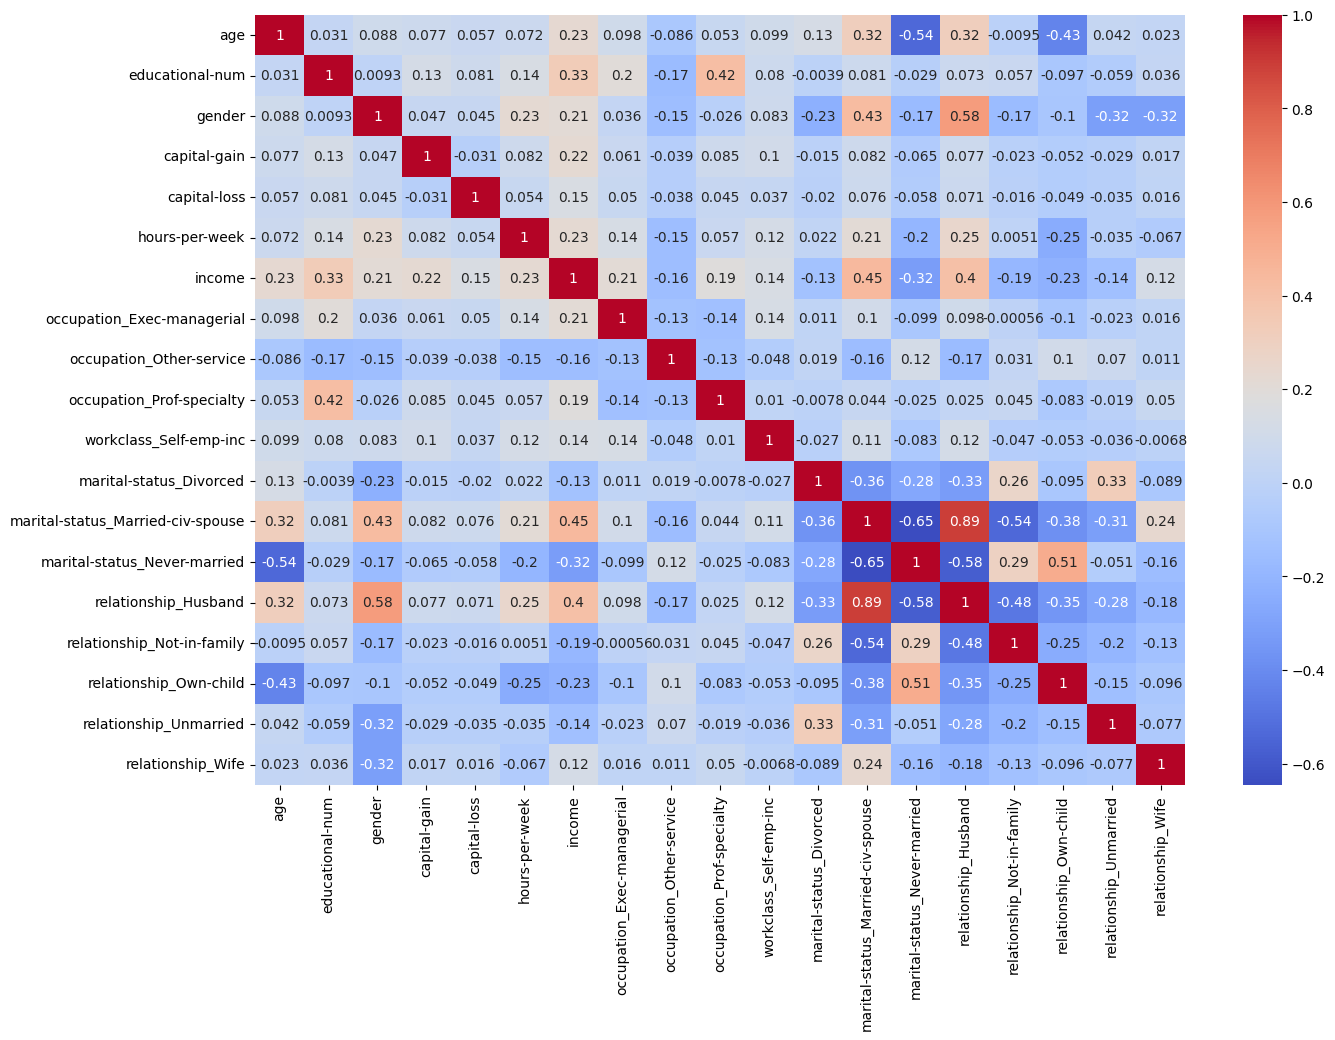

In [20]:
plt.figure(figsize=(15,10))
sns.heatmap(df_dropped.corr(),annot=True , cmap='coolwarm')

In [21]:
from sklearn.model_selection import train_test_split

data=data.drop('fnlwgt',axis=1)
train_df, test_df = train_test_split(data, test_size=0.2, random_state=42)

In [23]:
test_df.head()

,age,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation_?,occupation_Adm-clerical,occupation_Armed-Forces,...,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White
7762,56,9,0,0,0,40,0,False,False,False,...,False,False,True,False,False,False,False,False,False,True
23881,25,9,1,0,0,40,0,False,False,False,...,False,False,True,False,False,False,False,False,True,False
30507,43,13,0,14344,0,40,1,False,False,False,...,False,False,True,False,False,False,False,False,False,True
28911,32,9,1,0,0,40,0,False,False,False,...,False,False,True,False,False,False,False,False,False,True
19484,39,13,0,0,0,30,0,False,False,False,...,False,False,True,False,False,False,False,False,False,True


In [24]:
train_x=train_df.drop('income',axis=1)
train_y=train_df['income']
test_x=test_df.drop('income',axis=1)
test_y=test_df['income']

In [25]:
from sklearn.ensemble import RandomForestClassifier

forest=RandomForestClassifier()
forest.fit(train_x,train_y)

RandomForestClassifier()

In [26]:
forest.score(test_x,test_y)

0.8550516941345071

In [27]:
forest.feature_names_in_

array(['age', 'educational-num', 'gender', 'capital-gain', 'capital-loss',
       'hours-per-week', 'occupation_?', 'occupation_Adm-clerical',
       'occupation_Armed-Forces', 'occupation_Craft-repair',
       'occupation_Exec-managerial', 'occupation_Farming-fishing',
       'occupation_Handlers-cleaners', 'occupation_Machine-op-inspct',
       'occupation_Other-service', 'occupation_Priv-house-serv',
       'occupation_Prof-specialty', 'occupation_Protective-serv',
       'occupation_Sales', 'occupation_Tech-support',
       'occupation_Transport-moving', 'workclass_?',
       'workclass_Federal-gov', 'workclass_Local-gov',
       'workclass_Never-worked', 'workclass_Private',
       'workclass_Self-emp-inc', 'workclass_Self-emp-not-inc',
       'workclass_State-gov', 'workclass_Without-pay',
       'marital-status_Divorced', 'marital-status_Married-AF-spouse',
       'marital-status_Married-civ-spouse',
       'marital-status_Married-spouse-absent',
       'marital-status_Never-mar

In [28]:
importance=dict(zip(forest.feature_names_in_,forest.feature_importances_))
importance={k:v for k,v in sorted(importance.items(),key=lambda item:item[1],reverse=True)}

In [29]:
importance

{'age': 0.23097945477434245,
 'educational-num': 0.123905105363494,
 'hours-per-week': 0.11404428069950684,
 'capital-gain': 0.11045161711898502,
 'marital-status_Married-civ-spouse': 0.05892309474090613,
 'relationship_Husband': 0.05331303896180004,
 'capital-loss': 0.0392445816498826,
 'marital-status_Never-married': 0.025962080729542283,
 'occupation_Exec-managerial': 0.020243111615250428,
 'occupation_Prof-specialty': 0.020088328894153143,
 'relationship_Not-in-family': 0.013342720950662603,
 'gender': 0.013217427094196037,
 'relationship_Own-child': 0.010758128917286593,
 'relationship_Wife': 0.010524291618970354,
 'workclass_Private': 0.009617565637041624,
 'workclass_Self-emp-not-inc': 0.00784523788379333,
 'occupation_Other-service': 0.007730937249645072,
 'workclass_Self-emp-inc': 0.006488317760202022,
 'native-country_United-States': 0.0063299603077663705,
 'marital-status_Divorced': 0.006321840296063664,
 'occupation_Craft-repair': 0.006212024715234021,
 'occupation_Sales': 

In [30]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'n_estimators': [50, 100, 250],
    'max_depth': [None, 5, 10, 30],
    'min_samples_split': [2, 4],
    'max_features': ['sqrt', 'log2']  # Updated max_features options
}

grid_search = GridSearchCV(
    estimator=RandomForestClassifier(),
    param_grid=param_grid,
    verbose=10
)

grid_search.fit(train_x, train_y)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5; 1/48] START max_depth=None, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 1/5; 1/48] END max_depth=None, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.852 total time=   6.8s
[CV 2/5; 1/48] START max_depth=None, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 2/5; 1/48] END max_depth=None, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.846 total time=   7.5s
[CV 3/5; 1/48] START max_depth=None, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 3/5; 1/48] END max_depth=None, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.842 total time=   6.0s
[CV 4/5; 1/48] START max_depth=None, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 4/5; 1/48] END max_depth=None, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.845 total time=   4.8s
[CV 5/5; 1/48] START max_depth=None, max_features=sqrt, min_samples_sp

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 5, 10, 30],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [2, 4],
                         'n_estimators': [50, 100, 250]},
             verbose=10)

In [31]:
forest= grid_search.best_estimator_
forest.score(test_x,test_y)

0.8682567304739482